## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
print (enrollments[0])

{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f) 
        return list(reader) 

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print (daily_engagement[0])
print (project_submissions[0])

{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


In [3]:
a =7.8
b= '7.8'
c = int(a)
print ('c=', c)
d = float(b)
print ('d=', d)
e = int(float(b))
print ('e=', e)


c= 7
d= 7.8
e= 7


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
unique_students=int(0)
rows = int(0)
students=[]

for enrollment in enrollments:
    if enrollment['account_key'] not in students:
        students.append(enrollment['account_key'])
        unique_students=unique_students+1
    rows=rows+1
students_int = list(map(int, students))
students_order=sorted(students_int)    
print('enrollment rows=', rows) 
print('enrollment unique students=', unique_students)
#print(students_order)

unique_students1=int(0)
rows_eng = int(0)
acct=[]

for engagement in daily_engagement:
    if engagement['acct'] not in acct:
        acct.append(engagement['acct'])
        unique_students1=unique_students1+1
    rows_eng=rows_eng+1    
print('engagement rows=', rows_eng) 
print('engagement unique students=', unique_students1)

unique_students2=int(0)
rows_sub = int(0)
sub_key=[]

for submission in project_submissions:
    if submission['account_key'] not in sub_key:
        sub_key.append(submission['account_key'])
        unique_students2=unique_students2+1
    rows_sub=rows_sub+1    
print('submissions rows=', rows_sub) 
print('submission unique students=', unique_students2)

#another way to solve
enr_rows = len(enrollments) #it tells me the length of the list, which is the number of rows
eng_rows = len(daily_engagement)
sub_rows = len(project_submissions)
print ('enrollments rows: ', enr_rows, '\nengagement rows: ', eng_rows, '\nsubmissions rows: ', sub_rows )

unique_enrolled_students= set() #creating a set will allow me to add only unique student keys 
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
unique_enrollments=len(unique_enrolled_students)

unique_engagement_students= set() 
for engagement in daily_engagement:
    unique_engagement_students.add(engagement['acct'])
unique_engagement= len(unique_engagement_students)

unique_submission_students= set() 
for submission in project_submissions:
    unique_submission_students.add(submission['account_key'])
unique_submissions=len(unique_submission_students)

print ('unique enrollments: ', unique_enrollments, '\nunique engagement: ', unique_engagement, '\nunique submissions: ', unique_submissions )



enrollment rows= 1640
enrollment unique students= 1302
engagement rows= 136240
engagement unique students= 1237
submissions rows= 3642
submission unique students= 743
enrollments rows:  1640 
engagement rows:  136240 
submissions rows:  3642
unique enrollments:  1302 
unique engagement:  1237 
unique submissions:  743


In [11]:
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del[engagement['acct']]

In [12]:
def get_unique_students(data):
    unique_students=set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

unique_enrolled_students=get_unique_students(enrollments)
unique_engagement_students=get_unique_students(daily_engagement)
unique_submission_students=get_unique_students(project_submissions)

print(len(unique_enrolled_students), len(unique_engagement_students), len(unique_submission_students))


1302 1237 743


## Problems in the Data

In [13]:

#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

#for engagement in daily_engagement:
#    engagement['account_key'] = engagement['acct']
#    del[engagement['acct']]

print(daily_engagement[0]['account_key'])

0


## Missing Engagement Records

In [14]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
missing_students= set()

for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagement_students:
        missing_students.add(enrollment['account_key'])
        print (enrollment)
        break

missing_students


{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


{'1219'}

## Checking for More Problem Records

In [15]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
n=0
exceptions=dict()
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagement_students:
        if enrollment['days_to_cancel']!=0:
            print(enrollment)
            #print (enrollment)
            n=n+1 #to count how many exceptions there are

            
#print(exceptions)
print(n)


{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}
3


## Tracking Down the Remaining Problems

In [16]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [17]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [18]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [19]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students=dict()
for enrollment in non_udacity_enrollments: #is important to use the list without the udacity test accounts
    if not enrollment['is_canceled'] or enrollment['days_to_cancel']>7:
        key=enrollment['account_key']
        date=enrollment['join_date']
        if key not in paid_students or date>paid_students[key]:
            paid_students[key]=enrollment['join_date']

print(len(paid_students))

995


## Getting Data from First Week

In [20]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0



In [21]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data=[]
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
            

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)



In [22]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited']>0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [23]:
paid_engagement_in_first_week=[]
for engagement in paid_engagement:
    account_key=engagement['account_key']
    join_date=paid_students[account_key]
    engagement_date=engagement['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)
        
print(len(paid_engagement_in_first_week))


6919


## Exploring Student Engagement

In [24]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    
#engagement_by_account['1'] this is a dictionary containing lots of lists with all the engagement data
#from the first week of every paid_student, identified by its account_key

In [25]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes


In [26]:
total_minutes = list(total_minutes_by_account.values())

import numpy as np

# Summarize the data about minutes spent in the classroom

print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [27]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.


for account, minutes in total_minutes_by_account.items():
    if minutes>10080: #this is the number of minutes that are in one week
        print (account)
        student=account


In [28]:
#print each engagement record for the student 108:
for engagement in paid_engagement_in_first_week:
    if engagement['account_key']==student:
        print (engagement)
        


{'utc_date': datetime.datetime(2015, 8, 23, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 9.61211033333, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '686', 'has_visited': 1}


## Lessons Completed in First Week

In [108]:
import numpy as np
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data={}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

def describe_data(data):
    print ('Mean:', np.mean(list(data)))
    print ('Standard deviation:', np.std(list(data)))
    print ('Minimum:', np.min(list(data)))
    print ('Maximum:', np.max(list(data)))

    




In [109]:

lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())


Mean: 1.6328986960882648
Standard deviation: 3.000441445750347
Minimum: 0
Maximum: 36


In [31]:

mean=sum(lessons_completed_by_account.values())/len(lessons_completed_by_account)
mean

1.636180904522613

## Number of Visits in First Week

In [32]:
a=9
if a:
    print(True)

True


In [33]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

#option1: change the sum_grouped_items function so it add up only the de days the student has visited any classroom
#option2: create a fiel has_visited in the dictionary 1 or 0, then use the original sum grouped items fuction

for key, engagement_data in engagement_by_account.items():
    for data in engagement_data:
        courses_visited=data['num_courses_visited']
        if courses_visited:
            data['has_visited']=1
        else:
            data['has_visited']=0

days_visited_by_account=sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(list(days_visited_by_account.values()))

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [63]:
lesson='746169184'
lesson1='3176718735'
lesson2='09879008'
subway_project_lesson_keys = ['746169184', '3176718735']
if lesson2 in subway_project_lesson_keys:
    print(True)

In [86]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project=set()

for submission in paid_submissions:
    lesson_key=submission['lesson_key']
    rating=submission['assigned_rating']
    if lesson_key in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

print(len(pass_subway_project))

passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    account_key=engagement['account_key']
    if account_key in pass_subway_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
print(len(passing_engagement), len(non_passing_engagement))




647
4527 2392


In [87]:
len(non_passing_engagement)


2392

## Comparing the Two Student Groups

In [106]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).


passing_engagement_by_account=group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account=group_data(non_passing_engagement, 'account_key')

passing_minutes_visited_by_account=sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
passing_lessons_completed_by_account=sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
passing_days_visited_by_account=sum_grouped_items(passing_engagement_by_account, 'has_visited')

non_passing_minutes_visited_by_account=sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
non_passing_lessons_completed_by_account=sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
non_passing_days_visited_by_account=sum_grouped_items(non_passing_engagement_by_account, 'has_visited')


In [116]:
print('PASSING MINUTES VISITED')
describe_data(passing_minutes_visited_by_account.values())
print('\nNON PASSING MINUTES VISITED')
describe_data(non_passing_minutes_visited_by_account.values())

PASSING MINUTES VISITED
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997

NON PASSING MINUTES VISITED
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


In [117]:
print('PASSING LESSONS COMPLETED')
describe_data(passing_lessons_completed_by_account.values())
print('\nNON PASSING LESSONS COMPLETED')
describe_data(non_passing_lessons_completed_by_account.values())

PASSING LESSONS COMPLETED
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36

NON PASSING LESSONS COMPLETED
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


In [118]:
print('PASSING DAYS VISITED')
describe_data(passing_days_visited_by_account.values())
print('\nNON PASSING DAYS VISITED')
describe_data(non_passing_days_visited_by_account.values())

PASSING DAYS VISITED
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7

NON PASSING DAYS VISITED
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


In [121]:
daily_engagement_full=read_csv('daily_engagement_full.csv')


In [122]:
daily_engagement_full[0]

{'utc_date': '2014-11-05',
 'acct': '448',
 'registration_date': '2014-08-05',
 'subscription_start': '2014-11-05',
 'course_key': 'ud359-nd',
 'sibling_key': 'ud359',
 'course_title': 'Intro to Data Science',
 'has_visited': '0.0',
 'total_minutes_visited': '0.0',
 'lessons_completed': '0.0',
 'projects_completed': '0.0',
 'account_key': '2257038596'}

In [128]:
#analysing courses visited

passing_courses_visited_by_account=sum_grouped_items(passing_engagement_by_account, 'num_courses_visited')
non_passing_courses_visited_by_account=sum_grouped_items(non_passing_engagement_by_account, 'num_courses_visited')

print('PASSING COURSES VISITED')
describe_data(passing_courses_visited_by_account.values())
print('\nNON PASSING COURSES VISITED')
describe_data(non_passing_courses_visited_by_account.values())

PASSING COURSES VISITED
Mean: 4.726429675425039
Standard deviation: 3.7002397793039687
Minimum: 0
Maximum: 25

NON PASSING COURSES VISITED
Mean: 2.589080459770115
Standard deviation: 2.906709690253102
Minimum: 0
Maximum: 18


## Making Histograms

COURSES VISITED HISTOGRAM FOR STUDENTS WHO PASS 


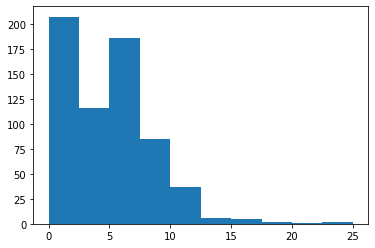

COURSES VISITED HISTOGRAM FOR STUDENTS WHO DIDNT PASS 


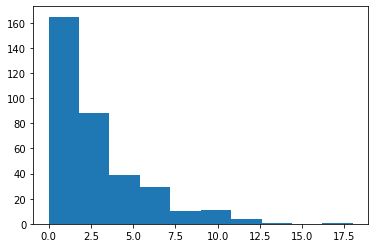

In [143]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

data = [1, 2, 1, 3, 3, 1, 4, 2]

#%matplotlib inline
import matplotlib.pyplot as plt
print('COURSES VISITED HISTOGRAM FOR STUDENTS WHO PASS ')
plt.hist(passing_courses_visited_by_account.values())
plt.show()

print('COURSES VISITED HISTOGRAM FOR STUDENTS WHO DIDNT PASS ')
plt.hist(non_passing_courses_visited_by_account.values())
plt.show()

LESSONS COMPLETED HISTOGRAM FOR STUDENTS WHO PASS 


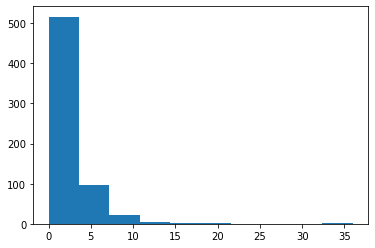

LESSONS COMPLETED HISTOGRAM FOR STUDENTS WHO DIDNT PASS 


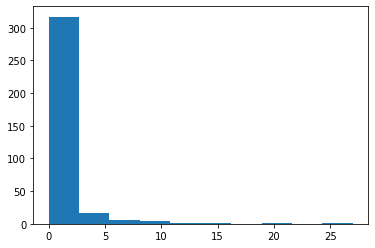

In [144]:
print('LESSONS COMPLETED HISTOGRAM FOR STUDENTS WHO PASS ')
plt.hist(passing_lessons_completed_by_account.values())
plt.show()

print('LESSONS COMPLETED HISTOGRAM FOR STUDENTS WHO DIDNT PASS ')
plt.hist(non_passing_lessons_completed_by_account.values())
plt.show()

DAYS VISITED HISTOGRAM FOR STUDENTS WHO PASS 


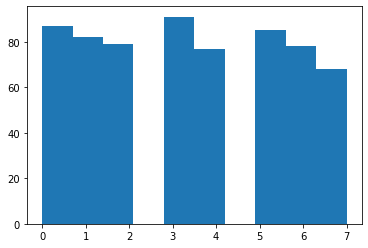

DAYS VISITED HISTOGRAM FOR STUDENTS WHO DIDNT PASS 


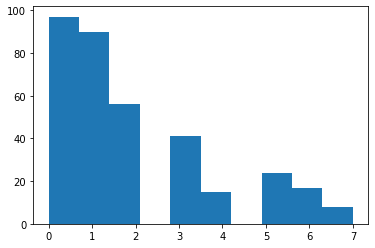

In [142]:
print('DAYS VISITED HISTOGRAM FOR STUDENTS WHO PASS ')
plt.hist(passing_days_visited_by_account.values())
plt.show()

print('DAYS VISITED HISTOGRAM FOR STUDENTS WHO DIDNT PASS ')
plt.hist(non_passing_days_visited_by_account.values())
plt.show()

MINUTES VISITED HISTOGRAM FOR STUDENTS WHO PASS 


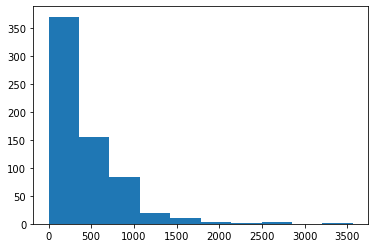

MINUTES VISITED HISTOGRAM FOR STUDENTS WHO DIDNT PASS 


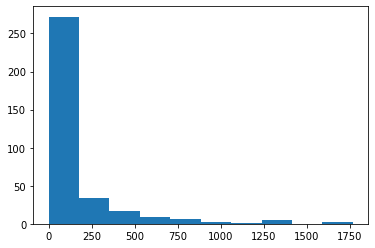

In [145]:
print('MINUTES VISITED HISTOGRAM FOR STUDENTS WHO PASS ')
plt.hist(passing_minutes_visited_by_account.values())
plt.show()

print('MINUTES VISITED HISTOGRAM FOR STUDENTS WHO DIDNT PASS ')
plt.hist(non_passing_minutes_visited_by_account.values())
plt.show()

## Improving Plots and Sharing Findings

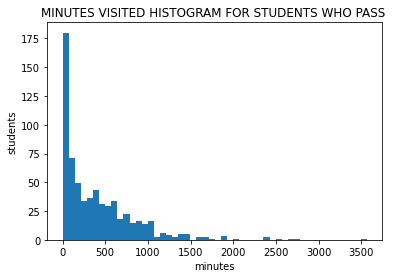

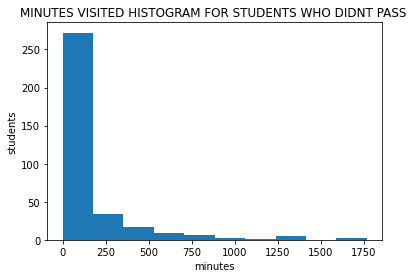

In [162]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

plt.title('MINUTES VISITED HISTOGRAM FOR STUDENTS WHO PASS ')
plt.hist(passing_minutes_visited_by_account.values(), bins=50)
plt.xlabel('minutes')
plt.ylabel('students')
plt.show()

plt.title('MINUTES VISITED HISTOGRAM FOR STUDENTS WHO DIDNT PASS ')
plt.hist(non_passing_minutes_visited_by_account.values())
plt.xlabel('minutes')
plt.ylabel('students')
plt.show()

AttributeError: 'dict_values' object has no attribute 'get'

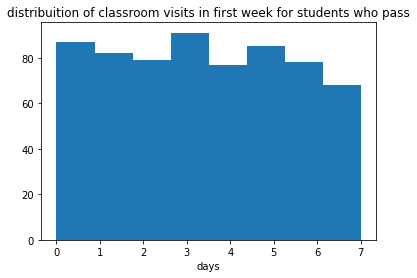

In [174]:
import seaborn as sns

plt.hist(passing_days_visited_by_account.values(), bins=8)
plt.xlabel('days')
plt.title('distribuition of classroom visits in first week for students who pass')

sns.catplot(x="days", kind="count", palette="Set2", data=passing_days_visited_by_account.values())

In [177]:
a=passing_days_visited_by_account.values()
sns.catplot(x="days", kind="count", palette="Set2", data=a)

AttributeError: 'dict_values' object has no attribute 'get'